In [1]:
# Carga de librerías
import numpy as np
import tensorflow as tf
import PIL
import PIL.Image
import pathlib
import scipy as sp
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Lambda
from tensorflow.keras import backend as K
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.collections import LineCollection
from matplotlib.font_manager import FontProperties
from pathlib import Path

from numpy.linalg import LinAlgError
from scipy.sparse.csgraph import laplacian
# from spectral_metric.lib import find_samples, compute_expectation_with_monter_carlo 
from spectral_metric.estimator import CumulativeGradientEstimator
from spectral_metric.visualize import make_graph

In [3]:
# Lectura de dataset

data_dir = ('../Datasets/CIFAR-10-only train')
data_dir = pathlib.Path(data_dir)

# Lectura de la carpeta train
data_dir_train = ('../Datasets/CIFAR-10-only train/train')
data_dir_train = pathlib.Path(data_dir_train)



image_count_train = len(list(data_dir_train.glob('*/*.png')))  # Cuenta la cantidad de imagenes de train


print(f"Cantidad de imagenes de train: {image_count_train}")


Cantidad de imagenes de train: 60000


In [4]:
# Dimensiones de imagen y tamaño de batch
img_height = 32
img_width = 32
#batch_size = len(list(data_dir.glob('*/*.png'))) # leer todas las imágenes al tiempo
batch_size = image_count_train

In [5]:
# PARA TRABAJAR CON LAS 20 CLASES, TOMAR LAS CARPETAS DE TEST Y LLEVARLAS A TRAIN (RENOMBRANDOLAS)

import tensorflow as tf
import pathlib

# Data splitting (entrenamiento y validación)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  #validation_split=0.2,
  color_mode='rgb',
  label_mode='int',
  #subset="training",
  #seed=123,
  shuffle=False,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 60000 files belonging to 20 classes.


In [6]:
class_names = train_ds.class_names
num_classes = len(class_names)  # get the number of the classes
print(f"Número de clases: {num_classes}")
print(f"Los nombres de las clases son: {class_names}")

Número de clases: 20
Los nombres de las clases son: ['airplane', 'airplane_t', 'automobile', 'automobile_t', 'bird', 'bird_t', 'cat', 'cat_t', 'deer', 'deer_t', 'dog', 'dog_t', 'frog', 'frog_t', 'horse', 'horse_t', 'ship', 'ship_t', 'truck', 'truck_t']


In [7]:
for images, labels0 in train_ds.take(1):  # only take first element of dataset
    x_train = images.numpy()
    y_train = labels0.numpy()

x_train /= 255.0  # Scale the features to the [0, 1] range
#x_train = x_train.reshape(len(x_train), 1, 256, 256)  # reshape into [N, C, H, W] for PyTorch
print(x_train.shape)

(60000, 32, 32, 3)


c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
c:\Users\Cesar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  ret

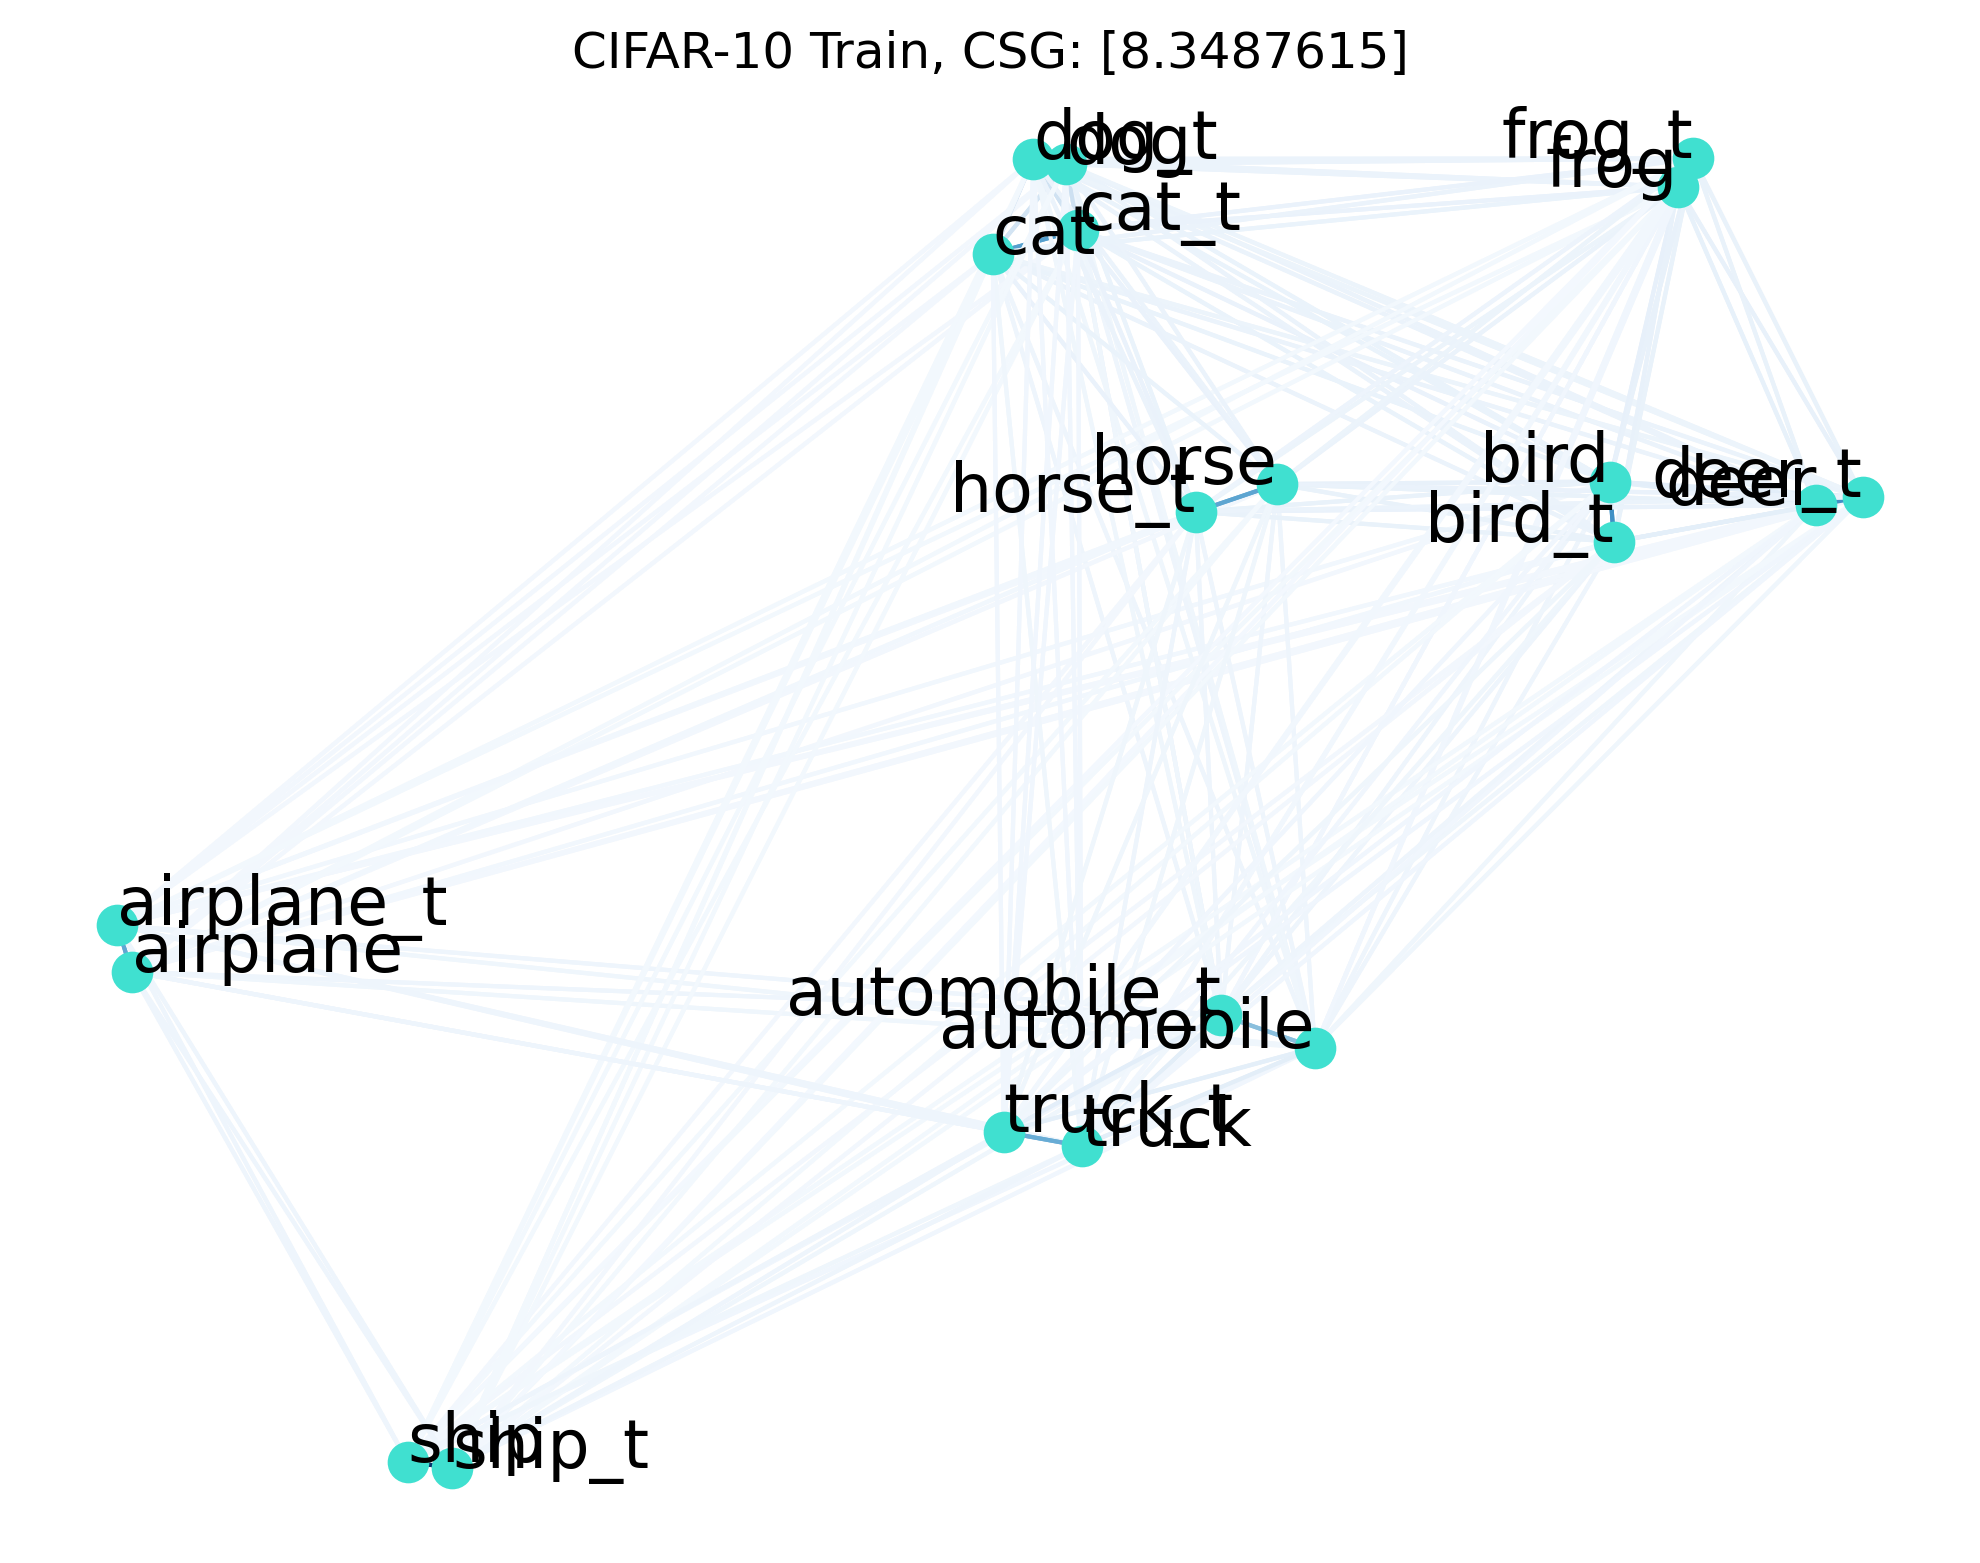

In [8]:
# CIFAR-10 TRAIN SET
X = x_train.reshape( (x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
y = y_train.reshape(y_train.shape[0],)

estimator = CumulativeGradientEstimator(M_sample=1000, k_nearest=10)
estimator.fit(data=X, target=y)
csg = estimator.csg  # The actual complexity values.
estimator.evals, estimator.evecs  # The eigenvalues and vectors.

# Plot the dataset
#make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=["airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

#make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=["airplane", "automobile", "bird",  "cat", "deer", "dog", "frog", "horse", "ship", "truck"])

#make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=["airplane", "airplane_t", "automobile", "automobile_t", "bird", "bird_t",  "cat", "cat_t", "deer", "deer_t", "dog", "dog_t", "frog", "frog_t", "horse", "horse_t", "ship", "ship_t", "truck", "truck_t"])

make_graph(estimator.difference, title="CIFAR-10 Train, CSG: "+str(csg), classes=class_names)
           

In [9]:
# Let's compute the W matrix from Branchaud et al. and try to find overlapping classes.
from spectral_metric.estimator import CumulativeGradientEstimator
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from spectral_metric.visualize import make_graph

#X, y = features, np.array(ds['intent'])  # Your dataset with shape [N, ?], [N]

#estimator = CumulativeGradientEstimator(M_sample=250, k_nearest=5, distance="cosine")
#estimator.fit(data=X, target=y)

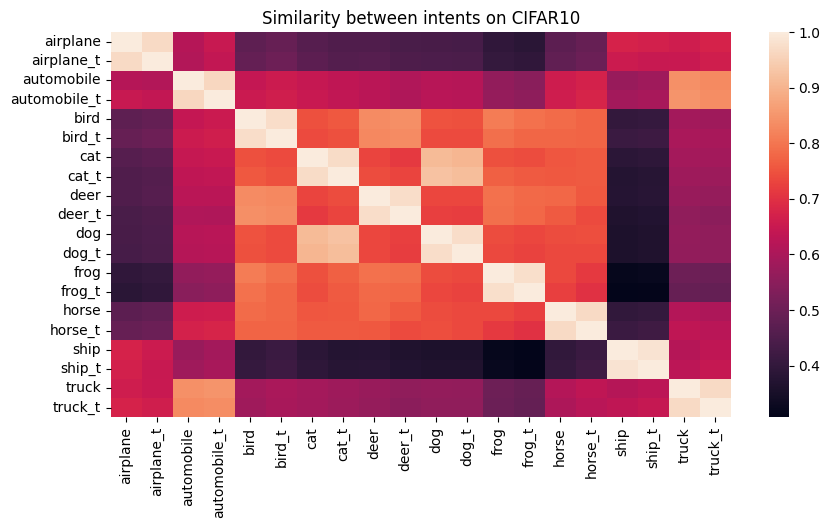

In [10]:
plt.figure(figsize=(10,5))
# Establecer las etiquetas del eje y con los nombres de las clases
sns.heatmap(estimator.W, xticklabels=class_names, yticklabels=class_names)
plt.title("Similarity between intents on CIFAR10")
plt.show()

In [11]:
#class_names=["airplane", "automobile", "bird",  "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#class_names=["airplane", "airplane_t", "automobile", "automobile_t", "bird", "bird_t",  "cat", "cat_t", "deer", "deer_t", "dog", "dog_t", "frog", "frog_t", "horse", "horse_t", "ship", "ship_t", "truck", "truck_t"]

from scipy.stats import entropy
import pandas as pd
entropy_per_class = entropy(estimator.W / estimator.W.sum(-1)[:, None], axis=-1)  # Mide la incertidumbre o desorden de las clases
print("Class that is the most confused (highest entropy):", class_names[np.argmax(entropy_per_class)])  # Muestra cual es la clase que encuentra mas dificil de clasificar o la clase en la cual las predicciones para el modelo son mas imprecisas

Class that is the most confused (highest entropy): automobile


In [12]:
pairs = list(zip(*np.unravel_index(np.argsort(estimator.W, axis=None), estimator.W.shape)))[::-1]
pairs = [(i,j) for i,j in pairs if i != j]

In [13]:
print("Most similar pairs")
lst = []
for idx, (i,j) in enumerate(pairs[::2][:10]):
    lst.append({"Intent pair" : f"{class_names[i]} <> {class_names[j]}", "Similarity": estimator.W[i,j]})
print(pd.DataFrame(lst))

Most similar pairs
                  Intent pair  Similarity
0              frog_t <> frog    0.982900
1              bird_t <> bird    0.980201
2              ship_t <> ship    0.979000
3                dog_t <> dog    0.976992
4            truck <> truck_t    0.971000
5              deer <> deer_t    0.969720
6                cat <> cat_t    0.969700
7            horse <> horse_t    0.966408
8  automobile_t <> automobile    0.965795
9      airplane_t <> airplane    0.963526


In [14]:
# 'i' y 'j' son las clases más similares

i = 0  # Clase más similar 1
j = 1  # Clase más similar 2

class_i_samples = X[y == i]
class_j_samples = X[y == j]

# Calcula las distancias entre las muestras dentro de cada clase
dist_i = sp.spatial.distance.pdist(class_i_samples)
dist_j = sp.spatial.distance.pdist(class_j_samples)

# Convierte las matrices de distancias condensadas en matrices cuadradas
dist_i_square = sp.spatial.distance.squareform(dist_i)
dist_j_square = sp.spatial.distance.squareform(dist_j)

# Encuentra los pares de muestras más cercanos dentro de cada clase
pair_i = np.unravel_index(np.argmin(dist_i_square), dist_i_square.shape)
pair_j = np.unravel_index(np.argmin(dist_j_square), dist_j_square.shape)

# Las muestras más similares dentro de las clases más similares son entonces
most_similar_in_i = class_i_samples[[pair_i[0], pair_i[1]]]
most_similar_in_j = class_j_samples[[pair_j[0], pair_j[1]]]


In [15]:
# Verifica la longitud de pair_i y pair_j
if len(pair_i) > 1:
    most_similar_in_i = class_i_samples[[pair_i[0], pair_i[1]]]
else:
    most_similar_in_i = class_i_samples[pair_i[0]]

if len(pair_j) > 1:
    most_similar_in_j = class_j_samples[[pair_j[0], pair_j[1]]]
else:
    most_similar_in_j = class_j_samples[pair_j[0]]


print(len(pair_i))
print(len(pair_j))



2
2


In [16]:

# Cuando cargas el conjunto de datos, también guarda los nombres de los archivos
filenames = [f.name for f in data_dir_train.glob('*/*.png')]

# Cuando divides los datos en clases, también guarda los índices originales
class_i_indices = np.where(y == i)[0]
class_j_indices = np.where(y == j)[0]
class_i_samples = X[class_i_indices]
class_j_samples = X[class_j_indices]

# Luego, cuando encuentres las muestras más similares, obtén sus índices originales
most_similar_in_i_indices = [class_i_indices[idx] for idx in pair_i]
most_similar_in_j_indices = [class_j_indices[idx] for idx in pair_j]

# Finalmente, usa estos índices para obtener los nombres de archivo correspondientes
most_similar_in_i_filenames = [filenames[idx] for idx in most_similar_in_i_indices]
most_similar_in_j_filenames = [filenames[idx] for idx in most_similar_in_j_indices]


In [17]:
"""
# Cuando cargas el conjunto de datos, también guarda los nombres de los archivos
filenames = [f.name for f in data_dir_train.glob('*/*.png')]

# Luego, cuando encuentres las muestras más similares, también obtén sus nombres de archivo correspondientes
most_similar_in_i_filenames = [filenames[idx] for idx in pair_i]
most_similar_in_j_filenames = [filenames[idx] for idx in pair_j]
"""

"\n# Cuando cargas el conjunto de datos, también guarda los nombres de los archivos\nfilenames = [f.name for f in data_dir_train.glob('*/*.png')]\n\n# Luego, cuando encuentres las muestras más similares, también obtén sus nombres de archivo correspondientes\nmost_similar_in_i_filenames = [filenames[idx] for idx in pair_i]\nmost_similar_in_j_filenames = [filenames[idx] for idx in pair_j]\n"

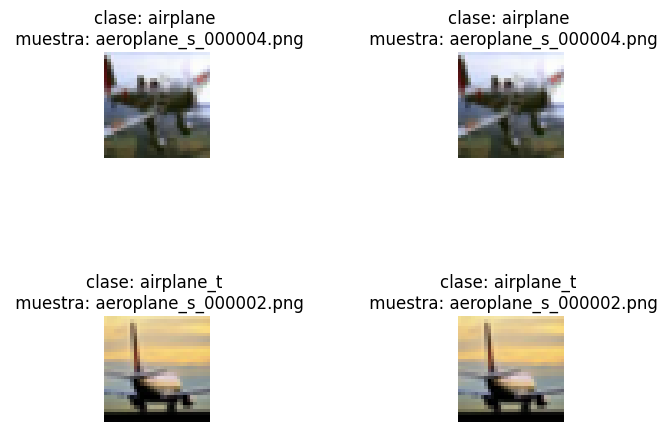

In [18]:
import matplotlib.pyplot as plt

# 'most_similar_in_i' y 'most_similar_in_j' son las muestras más similares ENCONTRADAS
# Se debe redimensionar las imágenes a su tamaño original antes de visualizarlas
img_i1 = most_similar_in_i[0].reshape(img_height, img_width, 3)
img_i2 = most_similar_in_i[1].reshape(img_height, img_width, 3)
img_j1 = most_similar_in_j[0].reshape(img_height, img_width, 3)
img_j2 = most_similar_in_j[1].reshape(img_height, img_width, 3)


# Crea una figura con 2x2 subtramas
#fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=1.5, hspace=1.5)


# Muestra las imágenes en las subtramas

axs[0, 0].imshow(img_i1)
axs[0, 0].set_title(f'clase: {class_names[i]} \n muestra: {most_similar_in_i_filenames[0]}')
axs[0, 1].imshow(img_i2)
axs[0, 1].set_title(f'clase: {class_names[i]} \n muestra: {most_similar_in_i_filenames[1]}')
axs[1, 0].imshow(img_j1)
axs[1, 0].set_title(f'clase: {class_names[j]} \n muestra: {most_similar_in_j_filenames[0]}')
axs[1, 1].imshow(img_j2)
axs[1, 1].set_title(f'clase: {class_names[j]} \n muestra: {most_similar_in_j_filenames[1]}')

"""
axs[0, 0].imshow(img_i1)
axs[0, 0].set_title(f'clase: {class_names[i]} - Muestra 1')
axs[0, 1].imshow(img_i2)
axs[0, 1].set_title(f'clase: {class_names[i]} - Muestra 2')
axs[1, 0].imshow(img_j1)
axs[1, 0].set_title(f'clase: {class_names[j]} - Muestra 1')
axs[1, 1].imshow(img_j2)
axs[1, 1].set_title(f'clase: {class_names[j]} - Muestra 2')
"""

# Elimina los ejes para todas las subtramas
for ax in axs.flat:
    ax.axis('off')



# Muestra la figura con l
plt.show()



In [19]:
"""
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:10]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        class_index = int(y_train[int(di)])  # Obtiene el índice de la clase
        print("\t", class_names[class_index])  # Imprime el nombre de la clase usando 'class_names'
        image = x_train[int(di)]
        plt.figure(figsize = (1,1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.show()
"""

frog_t <> frog
	 frog_t


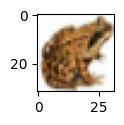

	 frog_t


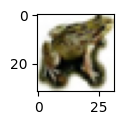

	 frog_t


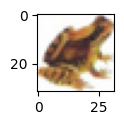

	 frog_t


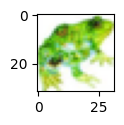

	 frog_t


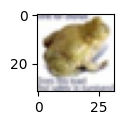

	 frog_t


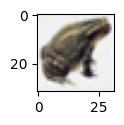

	 frog_t


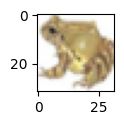

	 frog_t


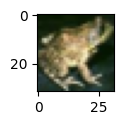

	 frog_t


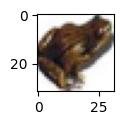

	 frog_t


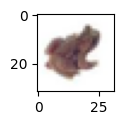

frog <> frog_t
	 frog


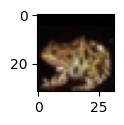

	 frog


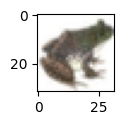

	 frog


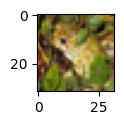

	 frog


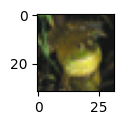

	 frog


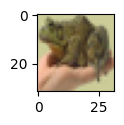

	 frog


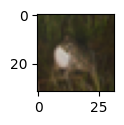

	 frog


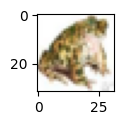

	 frog


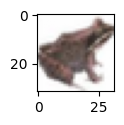

	 frog


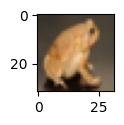

	 frog


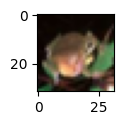

-----------------------------
bird_t <> bird
	 bird_t


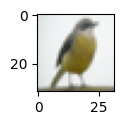

	 bird_t


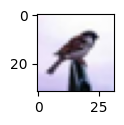

	 bird_t


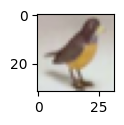

	 bird_t


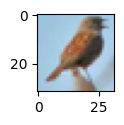

	 bird_t


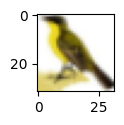

	 bird_t


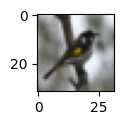

	 bird_t


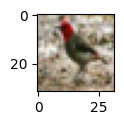

	 bird_t


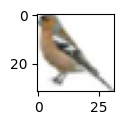

	 bird_t


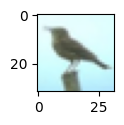

	 bird_t


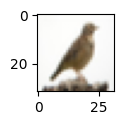

bird <> bird_t
	 bird


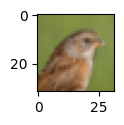

	 bird


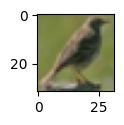

	 bird


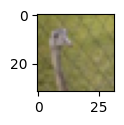

	 bird


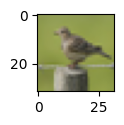

	 bird


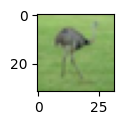

	 bird


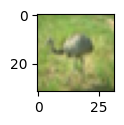

	 bird


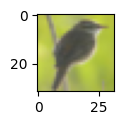

	 bird


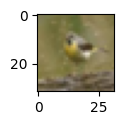

	 bird


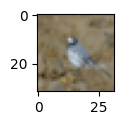

	 bird


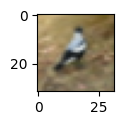

In [20]:
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:10]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        #print("\t", y_train[int(di)]["text"])
        class_index = int(y_train[int(di)])
        print("\t", class_names[class_index])
        image = x_train[int(di)]
        plt.figure(figsize = (1,1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.show()

first_pair = pairs[0]
show_most_confused(first_pair[0], first_pair[1], estimator, class_names)
show_most_confused(first_pair[1], first_pair[0], estimator, class_names)

print("-----------------------------")
second_pair = pairs[2]
show_most_confused(second_pair[0], second_pair[1], estimator, class_names)
show_most_confused(second_pair[1], second_pair[0], estimator, class_names)


Idea: Identificar las imágenes con mayor probabilidad de pertenencia a otra clase, es decir a una clase distinta de la etiqueta (del vector de estimación)... para quitarlas del dataset y entrenar desde cero un modelo con este dataset recortado... para comparar su rendimiento con el del modelo entrenado con el dataset completo

In [26]:

def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        #print("\t", y_train[int(di)]["text"])

        #print("\t", y_train[int(di)])
        print("\t", di)

        #image = x_train[int(di)]
        #plt.figure(figsize = (1,1))
        #plt.imshow(image, cmap=plt.get_cmap('gray'))
        #plt.show()

first_pair = pairs[0]
show_most_confused(first_pair[0], first_pair[1], estimator, class_names)
show_most_confused(first_pair[1], first_pair[0], estimator, class_names)

print("-----------------------------")
second_pair = pairs[2]
show_most_confused(second_pair[0], second_pair[1], estimator, class_names)
show_most_confused(second_pair[1], second_pair[0], estimator, class_names)


A = estimator.similarity_arrays[first_pair[0]].values()



frog_t <> frog
	 41788
	 41478
	 41753
	 41433
	 41828
	 41133
	 41604
	 41711
	 41131
	 41861
	 41451
	 41364
	 41657
	 41723
	 41742
	 41262
	 41357
	 41909
	 41466
	 41407
	 41792
	 41838
	 41277
	 41492
	 41345
	 41322
	 41261
	 41654
	 41821
	 41496
	 41679
	 41425
	 41506
	 41422
	 41116
	 41334
	 41674
	 41187
	 41588
	 41009
	 41089
	 41676
	 41661
	 41210
	 41333
	 41162
	 41648
	 41685
	 41832
	 41934
	 41735
	 41991
	 41530
	 41365
	 41270
	 41616
	 41822
	 41126
	 41204
	 41652
	 41258
	 41290
	 41660
	 41233
	 41083
	 41254
	 41421
	 41603
	 41183
	 41485
	 41308
	 41619
	 41775
	 41993
	 41018
	 41075
	 41122
	 41439
	 41732
	 41989
	 41136
	 41607
	 41196
	 41599
	 41561
	 41087
	 41665
	 41488
	 41219
	 41453
	 41953
	 41427
	 41802
	 41994
	 41807
	 41241
	 41690
	 41960
	 41304
	 41279
	 41163
	 41966
	 41460
	 41383
	 41854
	 41918
	 41622
	 41712
	 41876
	 41085
	 41250
	 41463
	 41808
	 41805
	 41000
	 41948
	 41508
	 41184
	 41287
	 41840
	 41923
	 41305
	 41540
	

In [34]:
"""
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        # Obtiene la imagen correspondiente al índice
        image = X[int(di)].reshape(img_height, img_width, 3)

        # Muestra la imagen
        plt.figure(figsize = (1,1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.show()

        # Imprime el nombre del archivo de la imagen
        print("\t", filenames[di])
"""

In [27]:
"""
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        # Imprime el nombre del archivo de la imagen en lugar del índice
        print("\t", filenames[di])
"""

In [36]:
"""

def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:10]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        class_index = int(y_train[int(di)])  
        print("\tClase: ", class_names[class_index])  # Imprime el nombre de la clase
        print("\tNombre de la imagen: ", filenames[di])  # Imprime el nombre de la imagen
        image = x_train[int(di)]
        plt.figure(figsize = (1,1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.show()
        
# Muestra las muestras más confusas para el par de clases 0 y 1
show_most_confused(0, 1, estimator, class_names)

# Muestra las muestras más confusas para el par de clases 1 y 2
show_most_confused(1, 2, estimator, class_names)
"""

frog_t <> frog
	Clase:  frog_t
	Nombre de la imagen:  rana_temporaria_s_001537.png


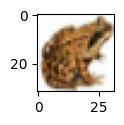

	Clase:  frog_t
	Nombre de la imagen:  grass_frog_s_000006.png


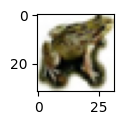

	Clase:  frog_t
	Nombre de la imagen:  rana_temporaria_s_000268.png


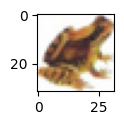

	Clase:  frog_t
	Nombre de la imagen:  frog_s_000067.png


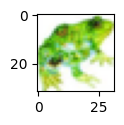

	Clase:  frog_t
	Nombre de la imagen:  spadefoot_s_000801.png


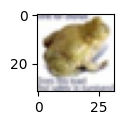

	Clase:  frog_t
	Nombre de la imagen:  bufo_bufo_s_000005.png


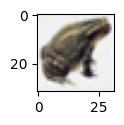

	Clase:  frog_t
	Nombre de la imagen:  leptodactylus_pentadactylus_s_000070.png


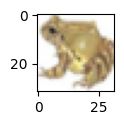

	Clase:  frog_t
	Nombre de la imagen:  rana_clamitans_s_000712.png


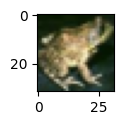

	Clase:  frog_t
	Nombre de la imagen:  bufo_boreas_s_000672.png


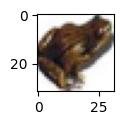

	Clase:  frog_t
	Nombre de la imagen:  tailed_frog_s_000639.png


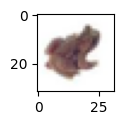

frog <> frog_t
	Clase:  frog
	Nombre de la imagen:  pickerel_frog_s_000619.png


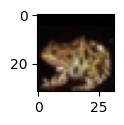

	Clase:  frog
	Nombre de la imagen:  rana_clamitans_s_000004.png


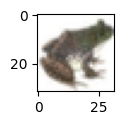

	Clase:  frog
	Nombre de la imagen:  bufo_viridis_s_000648.png


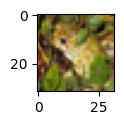

	Clase:  frog
	Nombre de la imagen:  rana_catesbeiana_s_000047.png


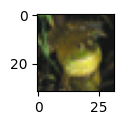

	Clase:  frog
	Nombre de la imagen:  bullfrog_s_000432.png


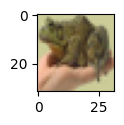

	Clase:  frog
	Nombre de la imagen:  bufo_viridis_s_000564.png


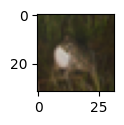

	Clase:  frog
	Nombre de la imagen:  bufo_viridis_s_000433.png


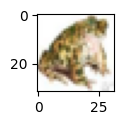

	Clase:  frog
	Nombre de la imagen:  rana_catesbeiana_s_001607.png


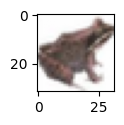

	Clase:  frog
	Nombre de la imagen:  bufo_americanus_s_000037.png


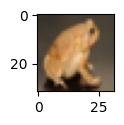

	Clase:  frog
	Nombre de la imagen:  barking_frog_s_000368.png


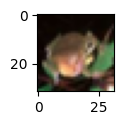

-----------------------------
bird_t <> bird
	Clase:  bird_t
	Nombre de la imagen:  passerine_s_001531.png


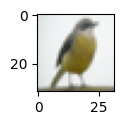

	Clase:  bird_t
	Nombre de la imagen:  sparrow_s_002275.png


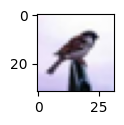

	Clase:  bird_t
	Nombre de la imagen:  bird_s_001564.png


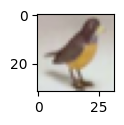

	Clase:  bird_t
	Nombre de la imagen:  prunella_modularis_s_000881.png


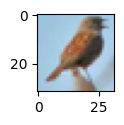

	Clase:  bird_t
	Nombre de la imagen:  wagtail_s_000996.png


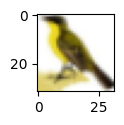

	Clase:  bird_t
	Nombre de la imagen:  honey_eater_s_000302.png


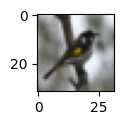

	Clase:  bird_t
	Nombre de la imagen:  honey_eater_s_001512.png


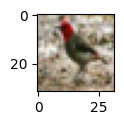

	Clase:  bird_t
	Nombre de la imagen:  hedge_sparrow_s_000134.png


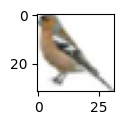

	Clase:  bird_t
	Nombre de la imagen:  lark_s_002035.png


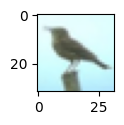

	Clase:  bird_t
	Nombre de la imagen:  lark_s_001530.png


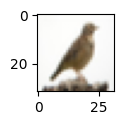

bird <> bird_t
	Clase:  bird
	Nombre de la imagen:  dunnock_s_000348.png


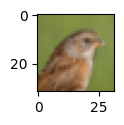

	Clase:  bird
	Nombre de la imagen:  anthus_pratensis_s_000467.png


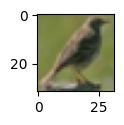

	Clase:  bird
	Nombre de la imagen:  nandu_s_001025.png


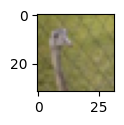

	Clase:  bird
	Nombre de la imagen:  alauda_arvensis_s_000093.png


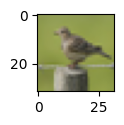

	Clase:  bird
	Nombre de la imagen:  nandu_s_000492.png


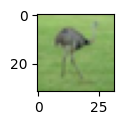

	Clase:  bird
	Nombre de la imagen:  rhea_americana_s_000207.png


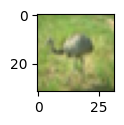

	Clase:  bird
	Nombre de la imagen:  passerine_s_001891.png


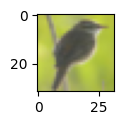

	Clase:  bird
	Nombre de la imagen:  wagtail_s_000640.png


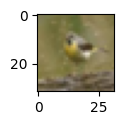

	Clase:  bird
	Nombre de la imagen:  wagtail_s_000358.png


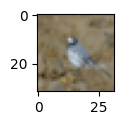

	Clase:  bird
	Nombre de la imagen:  bird_s_001296.png


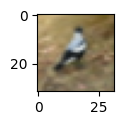

In [38]:
def show_most_confused(source_intent, target_intent, estimator, class_names):
    print(f"{class_names[source_intent]} <> {class_names[target_intent]}")
    closest_to_second = np.argsort([sample.sample_probability_norm[target_intent] for sample in estimator.similarity_arrays[source_intent].values()])[::-1][:10]
    dataset_indices = estimator.class_indices[source_intent][closest_to_second]
    for di in dataset_indices:
        class_index = int(y_train[int(di)])  
        print("\tClase: ", class_names[class_index])  # Imprime el nombre de la clase
        print("\tNombre de la imagen: ", filenames[di])  # Imprime el nombre de la imagen
        image = x_train[int(di)]
        plt.figure(figsize = (1,1))
        plt.imshow(image, cmap=plt.get_cmap('gray'))
        plt.show()

first_pair = pairs[0]
show_most_confused(first_pair[0], first_pair[1], estimator, class_names)
show_most_confused(first_pair[1], first_pair[0], estimator, class_names)

print("-----------------------------")
second_pair = pairs[2]
show_most_confused(second_pair[0], second_pair[1], estimator, class_names)
show_most_confused(second_pair[1], second_pair[0], estimator, class_names)

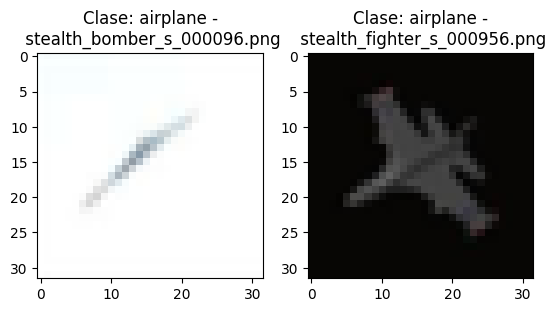

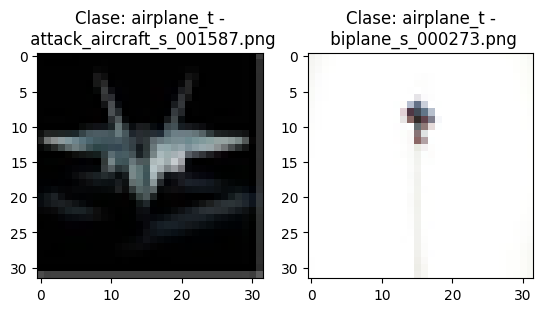

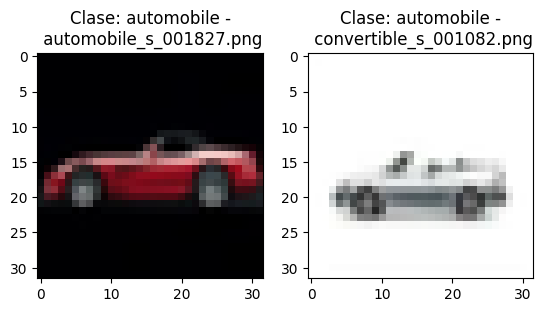

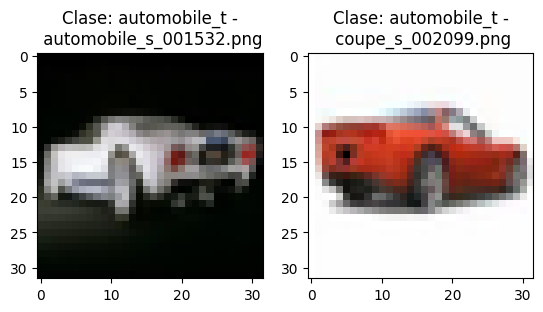

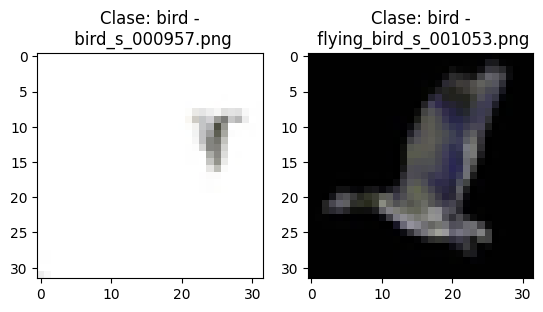

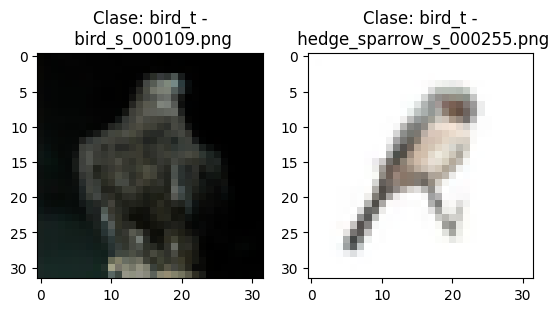

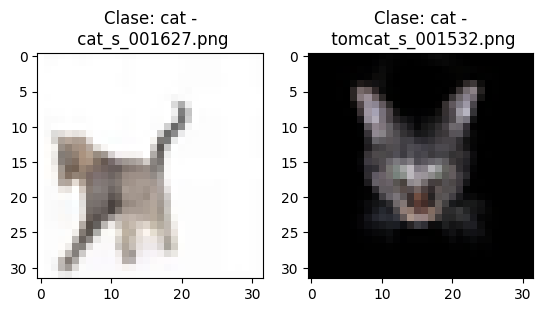

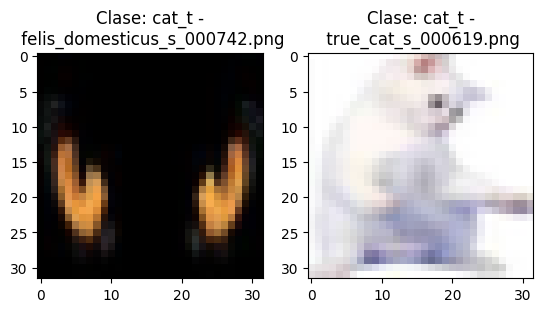

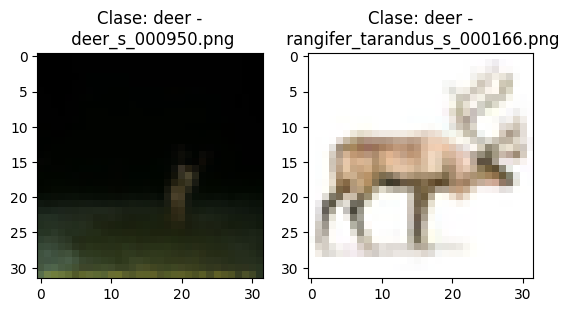

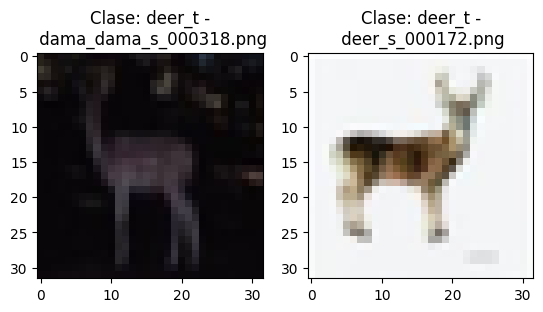

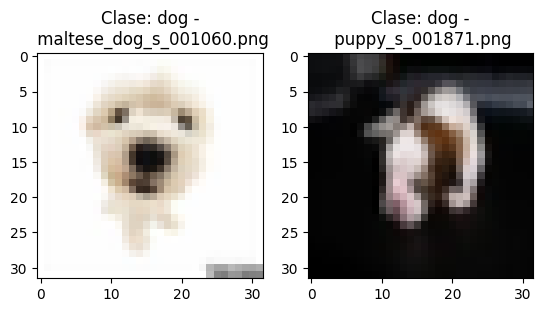

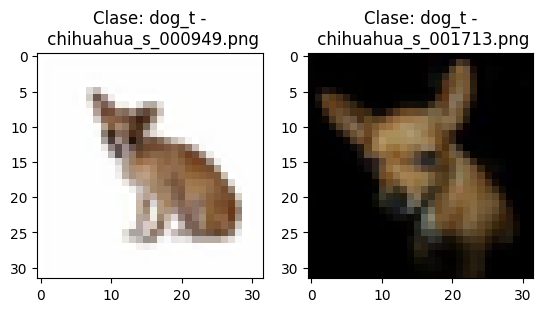

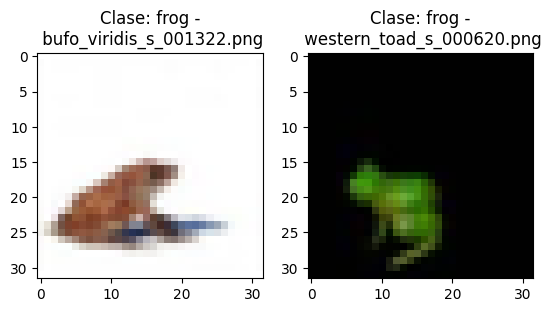

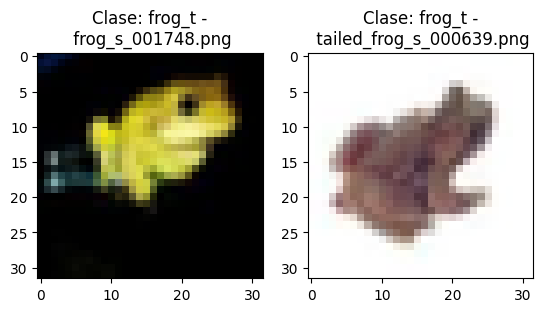

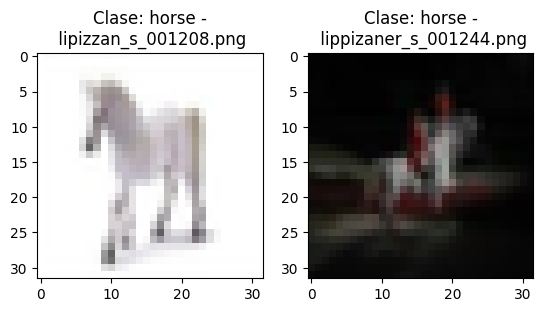

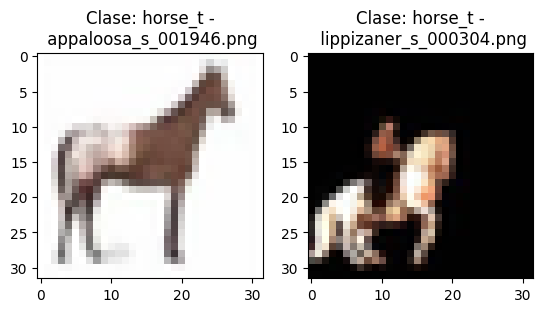

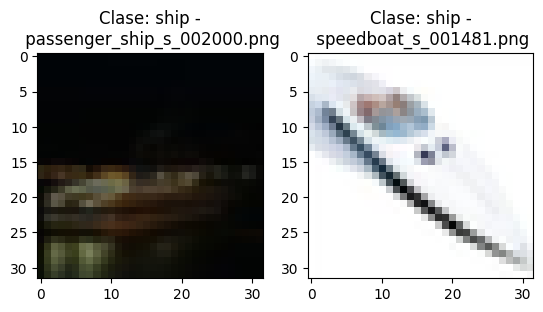

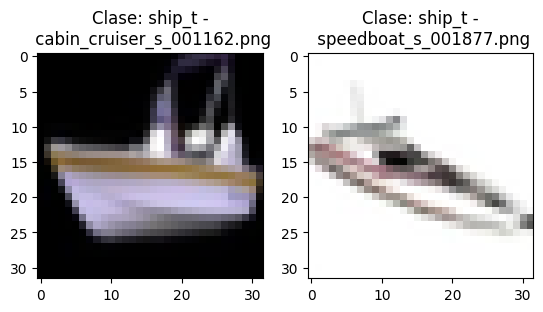

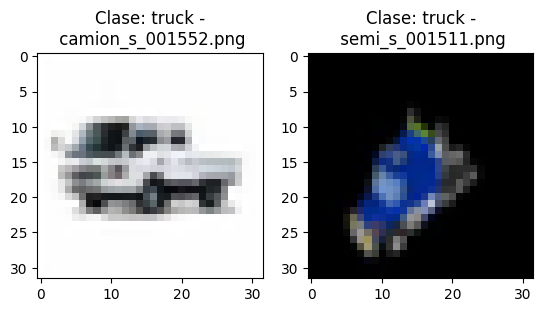

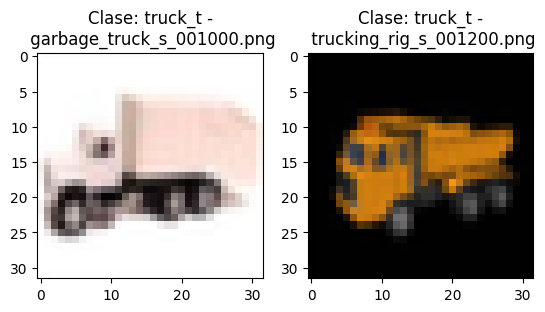

In [40]:
import matplotlib.pyplot as plt

# Itera sobre todas las clases
for i in range(num_classes):
    # Selecciona las muestras de la clase actual
    class_samples = X[y == i]
    class_indices = np.where(y == i)[0]  # Guarda los índices originales

    # Calcula las distancias entre las muestras dentro de la clase
    dist = sp.spatial.distance.pdist(class_samples)

    # Convierte la matriz de distancias condensada en una matriz cuadrada
    dist_square = sp.spatial.distance.squareform(dist)

    # Encuentra el par de muestras menos similares dentro de la clase
    pair = np.unravel_index(np.argmax(dist_square), dist_square.shape)

    # Las muestras menos similares dentro de la clase son:
    least_similar = class_samples[[pair[0], pair[1]]]
    least_similar_filenames = [filenames[idx] for idx in class_indices[[pair[0], pair[1]]]]  # Obtiene los nombres de archivo correspondientes

    # Muestra las imágenes menos similares
    img1 = least_similar[0].reshape(img_height, img_width, 3)
    img2 = least_similar[1].reshape(img_height, img_width, 3)

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img1)
    axs[0].set_title(f'Clase: {class_names[i]} -\n {least_similar_filenames[0]}')
    axs[1].imshow(img2)
    axs[1].set_title(f'Clase: {class_names[i]} -\n {least_similar_filenames[1]}')
    plt.show()


In [41]:
# Ordena los pares de clases en orden de similitud ascendente (menos similar primero)
pairs = list(zip(*np.unravel_index(np.argsort(estimator.W, axis=None), estimator.W.shape)))

# Filtra los pares donde i == j
pairs = [(i,j) for i,j in pairs if i != j]

print("Least similar pairs")
lst = []
for idx, (i,j) in enumerate(pairs[::2][:10]):
    lst.append({"Intent pair" : f"{class_names[i]} <> {class_names[j]}", "Similarity": estimator.W[i,j]})
print(pd.DataFrame(lst))


Least similar pairs
        Intent pair  Similarity
0    frog_t <> ship    0.309000
1  frog_t <> ship_t    0.311600
2      ship <> frog    0.312300
3    ship_t <> frog    0.314900
4       dog <> ship    0.362125
5     dog_t <> ship    0.362400
6     dog <> ship_t    0.364825
7   ship_t <> dog_t    0.365100
8    deer_t <> ship    0.366900
9  ship_t <> deer_t    0.370300
